# **Predicting Rankings of Tennis Players: The 2018 ATP Tour**

<br>

# **Introduction**

By using the data set of games won by a tennis player, we are able to use several categorical variables to predict and classify the future ranking of a particular tennis player based on these attributes. This leads to the question, how well do variables relating to player status, age, current rank, and playing hand predict, and game statistics the future ranking of the player during later tennis seasons? The dataset used to answer this question will be the game results for the top 500 players during the 2018 tennis season. This particular data was chosen to avoid interruptions by the COVID-19 pandemic and to ensure that the data would be stagnant, with no new data incoming. The dataset includes data from the winners of rounds of national and international tennis tournaments, hosted by the Association of Tennis Professionals (ATP).

<br>

# **Preliminary Exploratory Data Analysis**

### **Downloading and Importing Libraries**

In [1]:
# Download Libraries
# install.packages("tidyverse")
# install.packages("tidymodels")
# install.packages("repr")
# install.packages("gridExtra")
# install.packages("ggplot2")
# install.packages("GGally")

# Importing Libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(gridExtra)
library(ggplot2)
library(GGally)

library(digest)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom        0.7.10     ✔ rsample      0.1.1 
✔ dials        0.0.10     ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks

### **Setting Seed**

In [2]:
set.seed(1)

### **Download the Tennis Dataset**

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"
download.file(url, "data/data.csv")

### **Load the Tennis Dataset**

In [99]:
tennis <- read_csv("data/data.csv")

New names:
* `` -> ...1

Rows: 6866 Columns: 50

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



### **Reading and Understanding Data**

In [80]:
# Previewing top 5 data of the dataset
head(tennis)

tourney_name,draw_size,tourney_level,tourney_date,winner_name,loser_name,winner_ht,winner_ioc,score,best_of,⋯,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner_rank,loser_rank,winner_rank_points
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brisbane,32,A,20181231,Kei Nishikori,Daniil Medvedev,178,JPN,6-4 3-6 6-2,3,⋯,77,44,31,17,13,3,6,9,16,3590
Brisbane,32,A,20181231,Daniil Medvedev,Jo Wilfried Tsonga,NA,RUS,7-6(6) 6-2,3,⋯,52,33,28,14,10,0,1,16,239,1977
Brisbane,32,A,20181231,Kei Nishikori,Jeremy Chardy,178,JPN,6-2 6-2,3,⋯,47,33,26,9,8,2,2,9,40,3590
Brisbane,32,A,20181231,Jo Wilfried Tsonga,Alex De Minaur,188,FRA,6-4 7-6(2),3,⋯,68,43,34,15,11,4,5,239,31,200
Brisbane,32,A,20181231,Daniil Medvedev,Milos Raonic,NA,RUS,6-7(2) 6-3 6-4,3,⋯,105,68,48,25,16,8,8,16,18,1977
Brisbane,32,A,20181231,Jeremy Chardy,Yasutaka Uchiyama,188,FRA,6-4 3-6 7-6(4),3,⋯,94,58,44,18,16,4,8,40,185,1050


In [5]:
# Shape of the dataset
dim(tennis)

[1] 6866   50

In [6]:
# Examine the dataset
summary(tennis)

      ...1         tourney_id        tourney_name         surface         
 Min.   :   0.0   Length:6866        Length:6866        Length:6866       
 1st Qu.: 775.2   Class :character   Class :character   Class :character  
 Median :1485.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1466.4                                                           
 3rd Qu.:2169.8                                                           
 Max.   :2888.0                                                           
                                                                          
   draw_size      tourney_level       tourney_date        match_num     
 Min.   :  4.00   Length:6866        Min.   :20170102   Min.   :   1.0  
 1st Qu.: 32.00   Class :character   1st Qu.:20171002   1st Qu.: 243.0  
 Median : 32.00   Mode  :character   Median :20180716   Median : 278.0  
 Mean   : 60.72                      Mean   :20181355   Mean   : 264.6  
 3rd Qu.:128.00                    

In [7]:
# Column names of the dataset
colnames(tennis)

[1] "...1"               "tourney_id"         "tourney_name"      
 [4] "surface"            "draw_size"          "tourney_level"     
 [7] "tourney_date"       "match_num"          "winner_id"         
[10] "winner_seed"        "winner_entry"       "winner_name"       
[13] "winner_hand"        "winner_ht"          "winner_ioc"        
[16] "winner_age"         "loser_id"           "loser_seed"        
[19] "loser_entry"        "loser_name"         "loser_hand"        
[22] "loser_ht"           "loser_ioc"          "loser_age"         
[25] "score"              "best_of"            "round"             
[28] "minutes"            "w_ace"              "w_df"              
[31] "w_svpt"             "w_1stIn"            "w_1stWon"          
[34] "w_2ndWon"           "w_SvGms"            "w_bpSaved"         
[37] "w_bpFaced"          "l_ace"              "l_df"              
[40] "l_svpt"             "l_1stIn"            "l_1stWon"          
[43] "l_2ndWon"           "l_SvGms"            "l_bpSaved"         
[46] "l_bpFaced"          "winner_rank"        "winner_rank_points"
[49] "loser_rank"         "loser_rank_points"

### **Filtering the Dataset**

In [100]:
tennis <- subset(tennis, select = c(tourney_name, draw_size, tourney_level, tourney_date, winner_name, loser_name,
                                    winner_ht, winner_ioc, score, best_of, w_ace, 
                                    w_df, w_svpt, w_1stIn, w_1stWon, w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, 
                                    winner_rank, loser_rank, winner_rank_points))

In [101]:
tennis <- filter(tennis, substr(tourney_date, 0, 4) == "2018")
tennis

tourney_name,draw_size,tourney_level,tourney_date,winner_name,loser_name,winner_ht,winner_ioc,score,best_of,⋯,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner_rank,loser_rank,winner_rank_points
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brisbane,32,A,20181231,Kei Nishikori,Daniil Medvedev,178,JPN,6-4 3-6 6-2,3,⋯,77,44,31,17,13,3,6,9,16,3590
Brisbane,32,A,20181231,Daniil Medvedev,Jo Wilfried Tsonga,NA,RUS,7-6(6) 6-2,3,⋯,52,33,28,14,10,0,1,16,239,1977
Brisbane,32,A,20181231,Kei Nishikori,Jeremy Chardy,178,JPN,6-2 6-2,3,⋯,47,33,26,9,8,2,2,9,40,3590
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Davis Cup WG F: FRA vs CRO,4,D,20181123,Borna Coric,Jeremy Chardy,NA,CRO,6-2 7-5 6-4,3,⋯,78,59,47,15,15,2,2,12,40,2480
Davis Cup WG F: FRA vs CRO,4,D,20181123,Marin Cilic,Jo Wilfried Tsonga,198,CRO,6-3 7-5 6-4,3,⋯,86,53,48,20,16,5,5,7,259,4250
Davis Cup WG F: FRA vs CRO,4,D,20181123,Marin Cilic,Lucas Pouille,198,CRO,7-6(3) 6-3 6-3,3,⋯,83,44,39,26,15,0,0,7,32,4250


#### **Group By Player Name**

In [114]:
player_stats_win <- group_by(tennis, winner_name) %>% 
    summarize(winner_rank = mean(winner_rank), 
              n_winner = n(), 
              w_ace = mean(w_ace), w_df = mean(w_df), 
              w_svpt = mean(w_svpt), w_1stIn = mean(w_1stIn), w_1stWon = mean(w_1stWon), 
              w_2ndWon = mean(w_2ndWon), w_SvGms = mean(w_SvGms), w_bpSaved = mean(w_bpSaved), 
              w_bpFaced = mean(w_bpFaced)) %>% 
    na.omit() %>% 
    arrange(winner_rank) %>% 
    rename(name = winner_name)

player_stats_lose <- group_by(tennis, loser_name) %>% 
    summarize(loser_rank = mean(loser_rank), n_lose = n()) %>% 
    na.omit() %>% 
    arrange(loser_rank) %>%
    rename(name = loser_name)

player_stats <- merge(player_stats_win, player_stats_lose, by = "name") %>% 
    arrange(winner_rank) %>% 
    head(100)

player_stats <- player_stats %>% 
    mutate(total_played = n_winner + n_lose, 
           win_percent = n_winner / (n_winner + n_lose)) %>% 
    arrange(desc(win_percent)) %>% 
    subset(select = -c(n_winner, n_lose, loser_rank))

player_stats

,name,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,total_played,win_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Rafael Nadal,1.119048,2.357143,2.119048,77.16667,49.90476,36.23810,16.78571,12.85714,3.642857,5.166667,46,0.9130435
2,Novak Djokovic,10.888889,5.185185,2.277778,76.12963,50.37037,38.12963,15.00000,12.74074,2.666667,3.944444,67,0.8059701
3,Alexander Zverev,3.905660,8.075472,2.528302,73.67925,48.00000,36.98113,14.26415,12.43396,2.830189,4.188679,72,0.7361111
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
98,Jordan Thompson,86.5,0.5,3,52,39.5,28.5,4.5,8.5,2.5,4,11,0.1818182
99,Calvin Hemery,127.0,11.0,6,114,72.0,49.0,22.0,16.0,3.0,5,6,0.1666667
100,Yannick Hanfmann,118.0,6.0,0,49,41.0,30.0,7.0,9.0,0.0,0,7,0.1428571


### **Splitting the Data into Training and Testing Set**

In [107]:
set.seed(1)

player_split <- initial_split(player_stats, prop = 3/4, strata = winner_rank)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_testing
player_training

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,win_percent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3.90566,8.075472,2.528302,73.67925,48.00,36.98113,14.26415,12.43396,2.830189,4.188679,0.7361111
7,108.94118,4.705882,2.058824,74.17647,48.00,34.70588,15.17647,11.94118,3.294118,4.941176,0.6800000
9,22.08000,21.960000,5.000000,91.52000,59.52,48.64000,17.48000,15.08000,2.880000,3.880000,0.6410256
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,46.71429,5.571429,3.000000,82.71429,51.42857,40.00000,16.571429,13.28571,4.142857,5.714286,0.2500000
94,116.00000,1.333333,2.000000,51.66667,34.00000,27.00000,9.666667,9.00000,3.333333,4.000000,0.2307692
95,125.66667,5.000000,4.333333,93.66667,51.33333,41.33333,25.333333,14.00000,3.666667,5.333333,0.2307692


,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,win_percent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.119048,2.357143,2.119048,77.16667,49.90476,36.23810,16.78571,12.85714,3.642857,5.166667,0.9130435
2,10.888889,5.185185,2.277778,76.12963,50.37037,38.12963,15.00000,12.74074,2.666667,3.944444,0.8059701
4,7.913043,18.108696,2.826087,90.34783,59.00000,48.26087,18.10870,15.23913,2.500000,3.500000,0.7076923
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,114,4,4,82,44,31.5,17.5,13,3.5,6.5,0.2000000
99,127,11,6,114,72,49.0,22.0,16,3.0,5.0,0.1666667
100,118,6,0,49,41,30.0,7.0,9,0.0,0.0,0.1428571


### **Univariate Analysis**

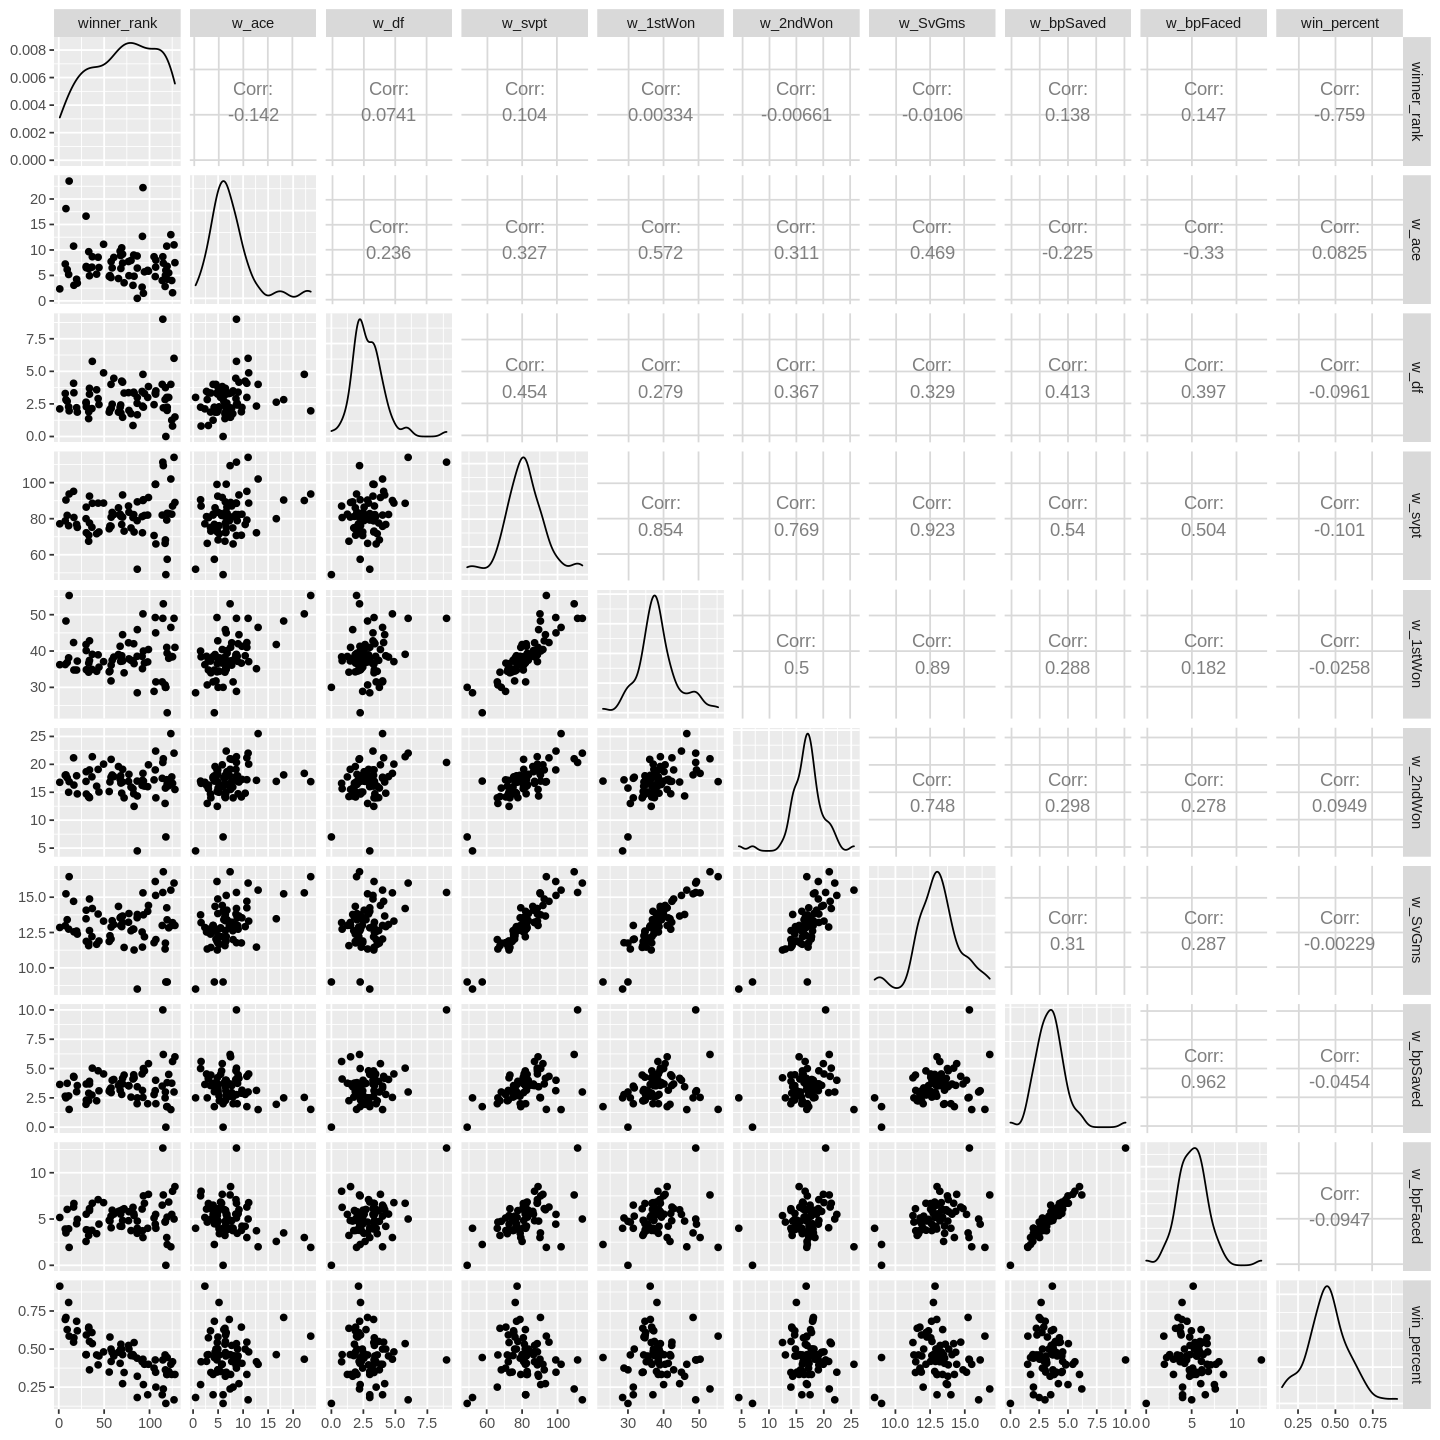

In [104]:
options(repr.plot.width = 12, repr.plot.height = 12)

player_training %>% ggpairs()

### **Bivariate Analysis**

In [15]:
options(repr.plot.width = 9, repr.plot.height = 6)

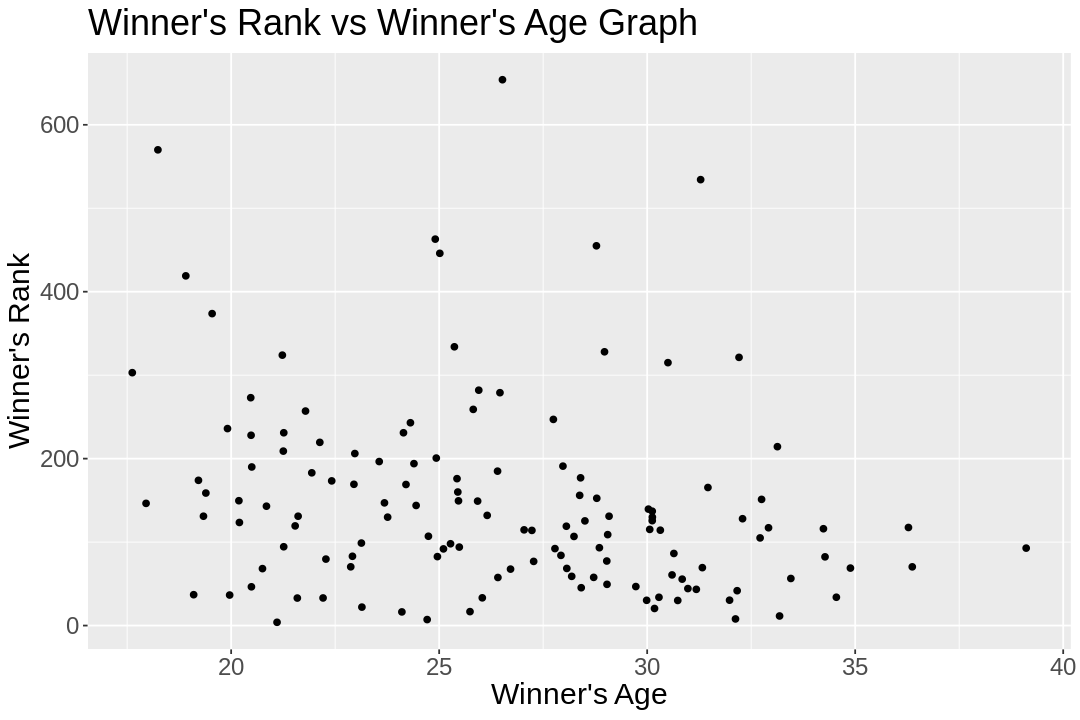

In [16]:
# Winner's Rank vs Winner's Age

rank_vs_age <- player_training %>% 
    ggplot(aes(x = winner_age, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Age", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Age Graph") +
        theme(text = element_text(size = 18))

rank_vs_age

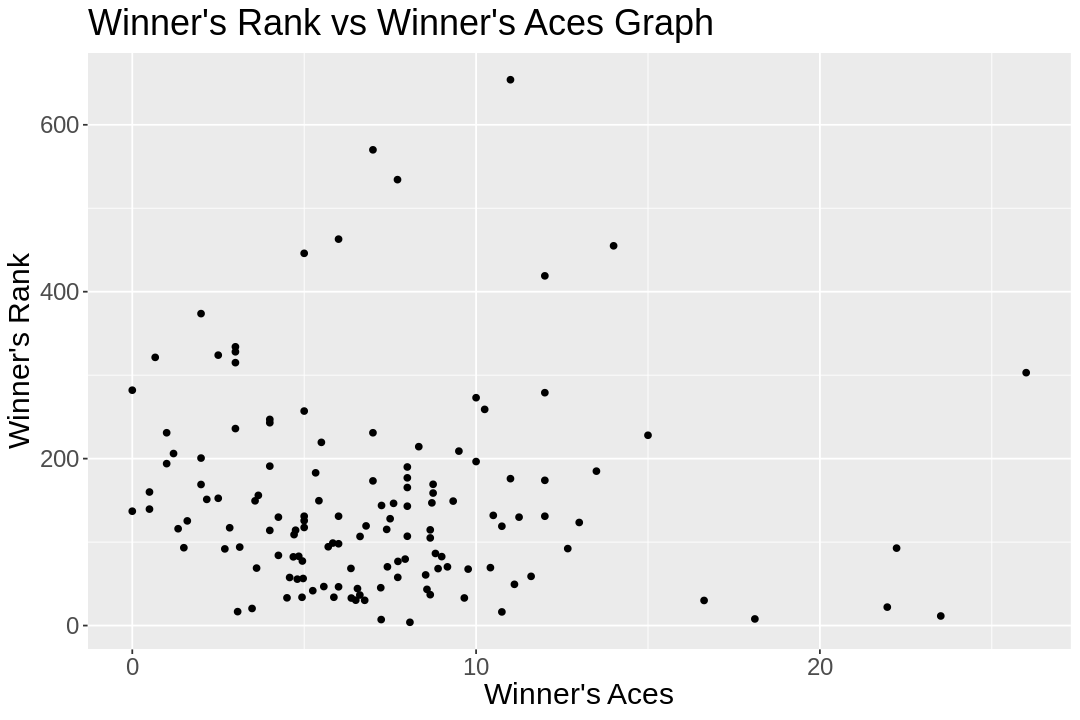

In [17]:
# Winner's Rank vs Winner's Aces

rank_vs_aces <- player_training %>% 
    ggplot(aes(x = w_ace, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Aces", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Aces Graph") +
        theme(text = element_text(size = 18))

rank_vs_aces

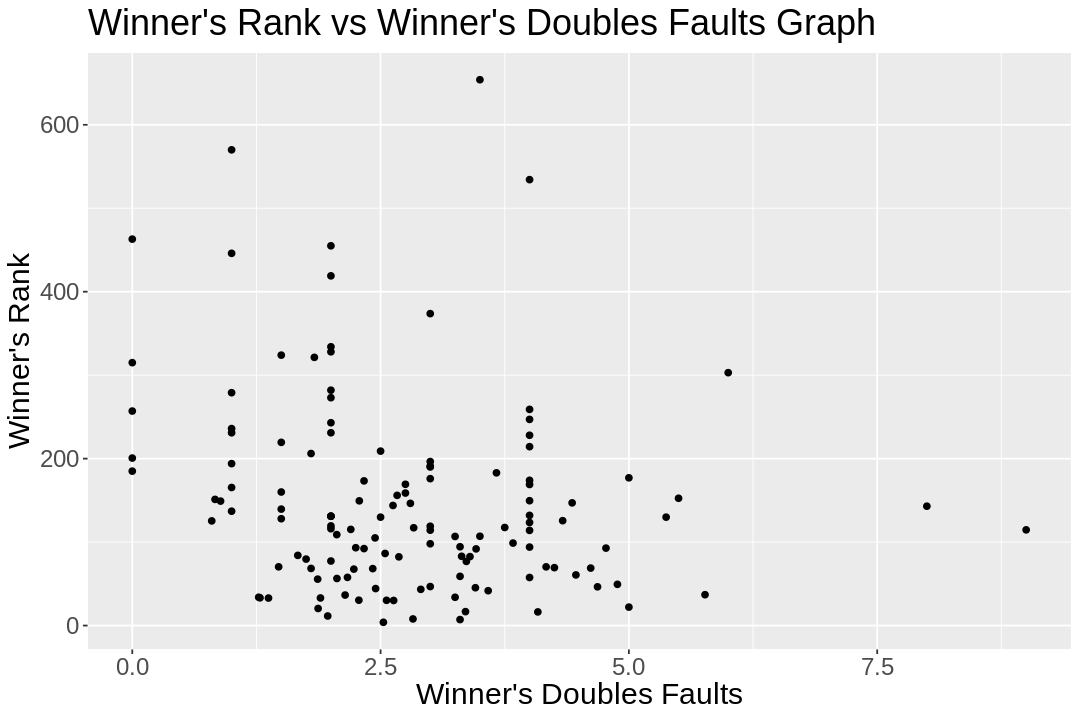

In [18]:
# Winner's Rank vs Winner's Doubles Faults

rank_vs_df <- player_training %>% 
    ggplot(aes(x = w_df, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Doubles Faults", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Doubles Faults Graph") +
        theme(text = element_text(size = 18))

rank_vs_df

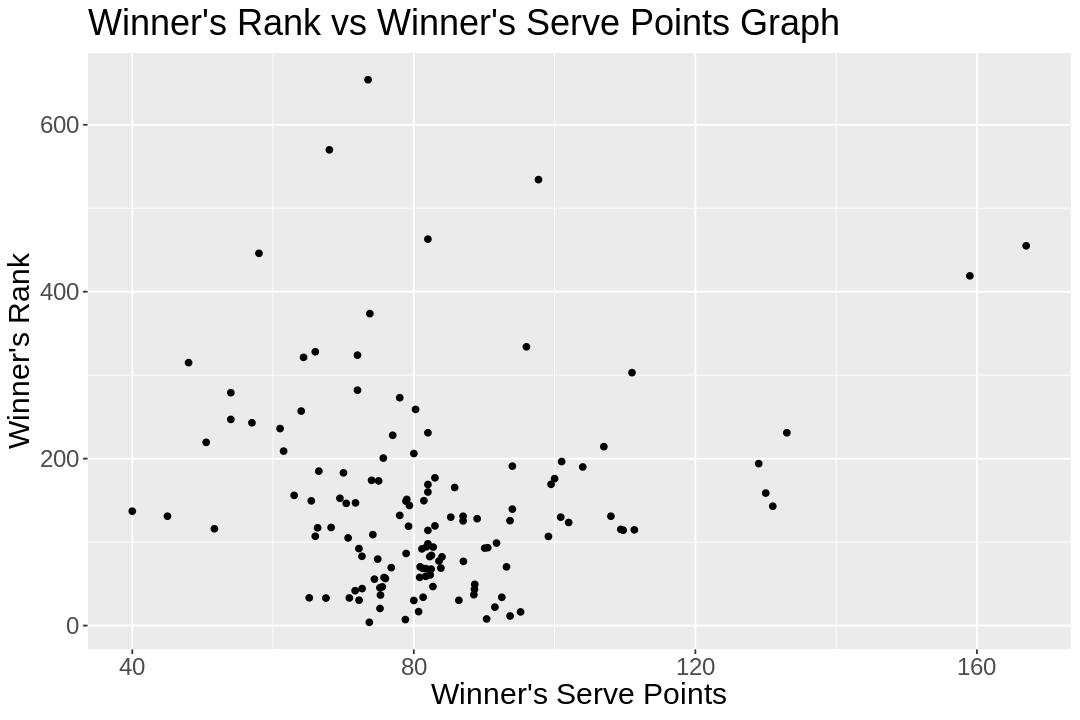

In [19]:
# Winner's Rank vs Winner's Serve Points

rank_vs_svpt <- player_training %>% 
    ggplot(aes(x = w_svpt, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Serve Points", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Serve Points Graph") +
        theme(text = element_text(size = 18))

rank_vs_svpt

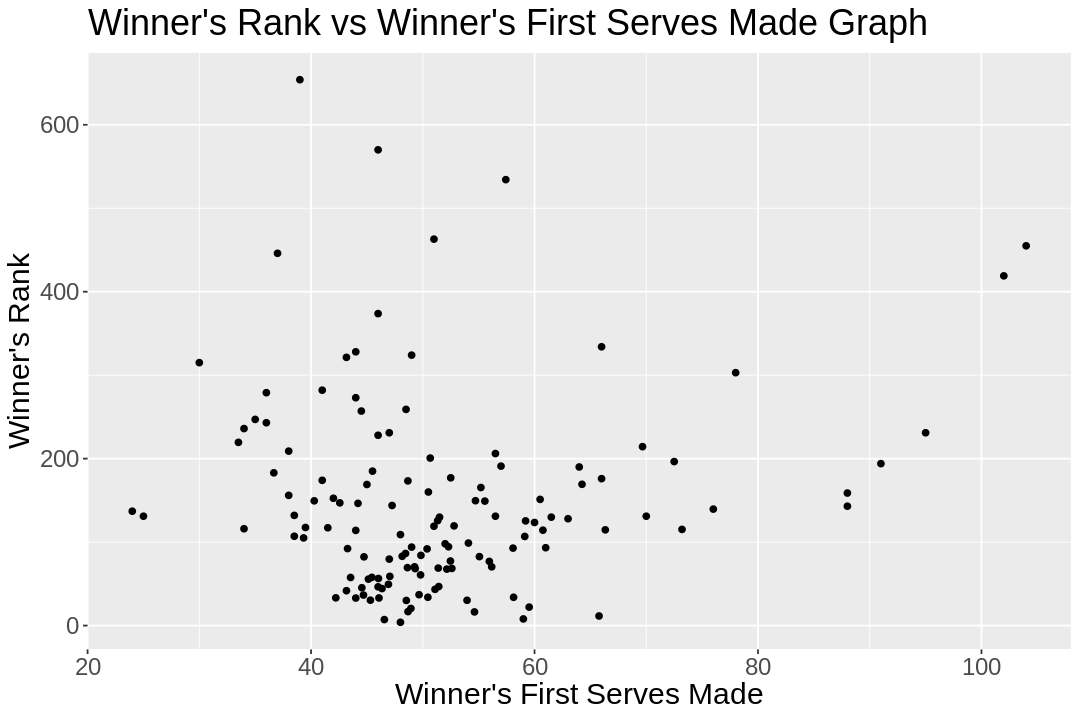

In [20]:
# Winner's Rank vs Winner's First Serves Made

rank_vs_1stIn <- player_training %>% 
    ggplot(aes(x = w_1stIn, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's First Serves Made", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's First Serves Made Graph") +
        theme(text = element_text(size = 18))

rank_vs_1stIn

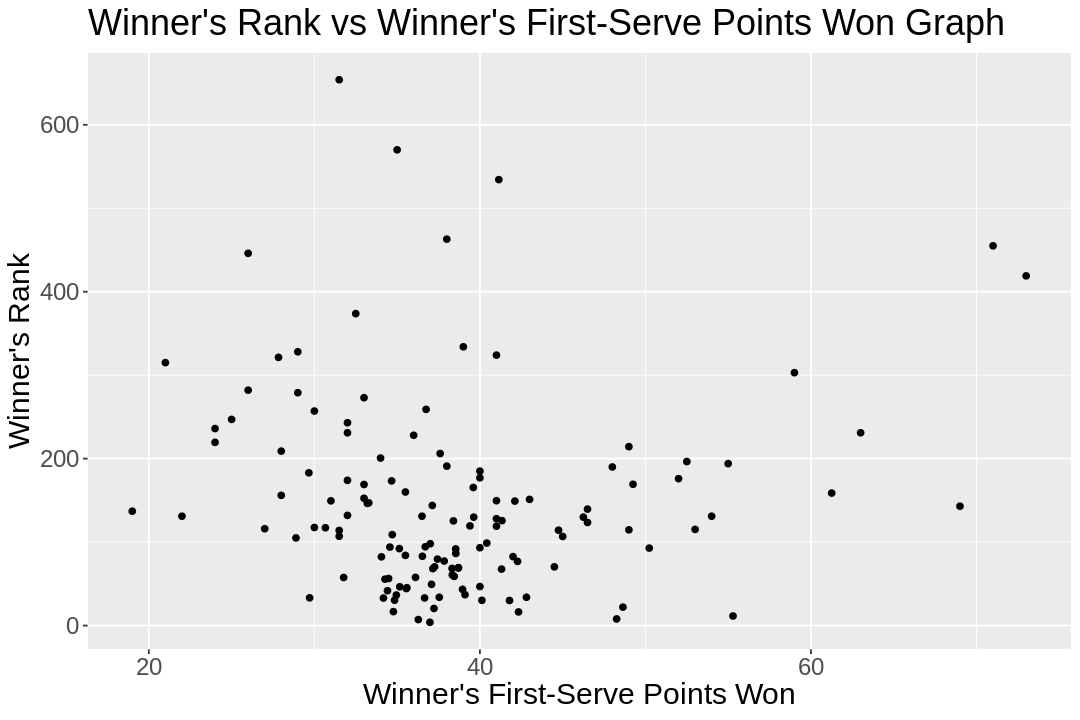

In [21]:
# Winner's Rank vs Winner's First-Serve Points Won

rank_vs_1stWon <- player_training %>% 
    ggplot(aes(x = w_1stWon, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's First-Serve Points Won", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's First-Serve Points Won Graph") +
        theme(text = element_text(size = 18))

rank_vs_1stWon

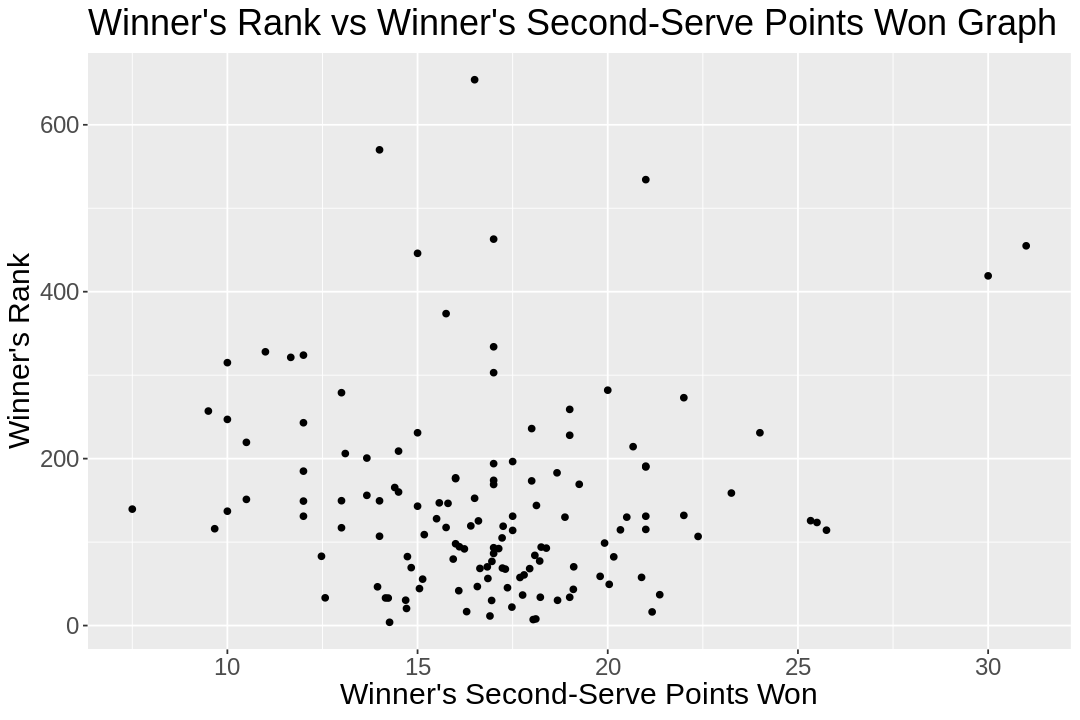

In [22]:
# Winner's Rank vs Winner's Second-Serve Points Won

rank_vs_2ndWon <- player_training %>% 
    ggplot(aes(x = w_2ndWon, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Second-Serve Points Won", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Second-Serve Points Won Graph") +
        theme(text = element_text(size = 18))

rank_vs_2ndWon

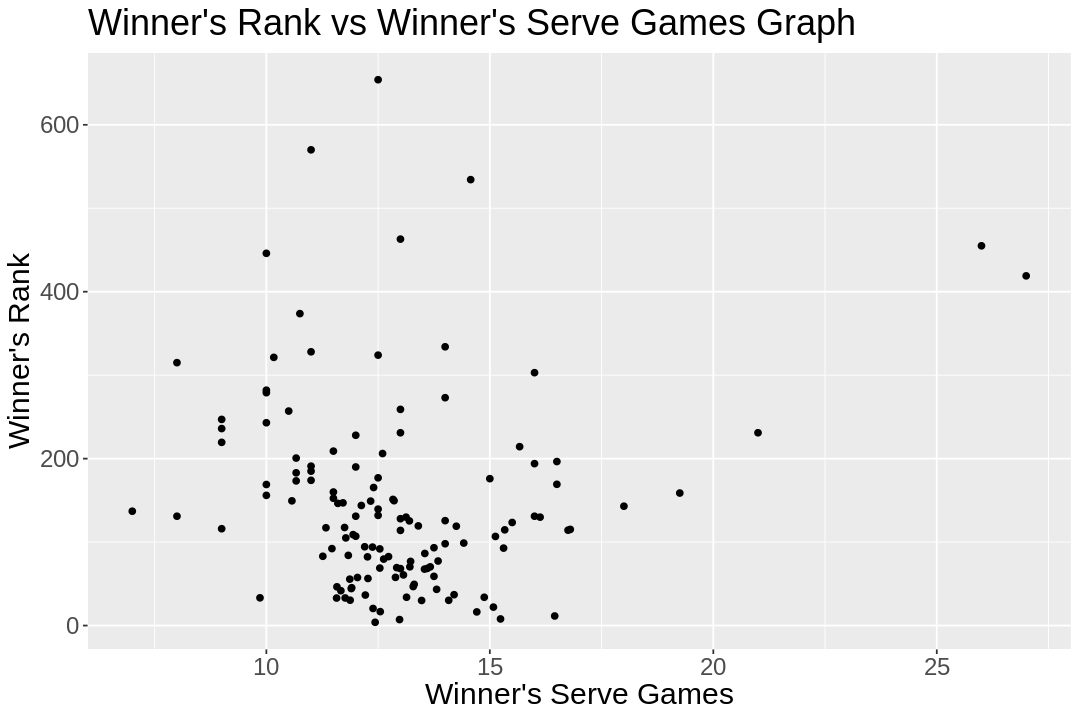

In [23]:
# Winner's Rank vs Winner's Serve Games

rank_vs_svgm <- player_training %>% 
    ggplot(aes(x = w_SvGms, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Serve Games", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Serve Games Graph") +
        theme(text = element_text(size = 18))

rank_vs_svgm

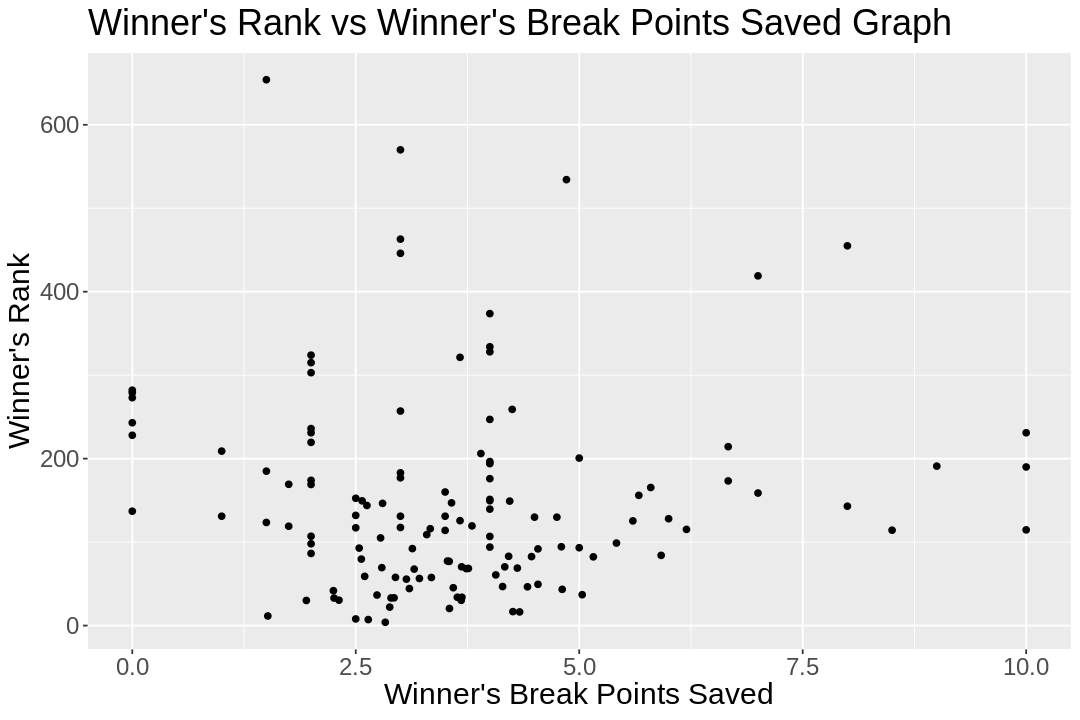

In [24]:
# Winner's Rank vs Winner's Break Points Saved

rank_vs_bps <- player_training %>% 
    ggplot(aes(x = w_bpSaved, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Break Points Saved", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Break Points Saved Graph") +
        theme(text = element_text(size = 18))

rank_vs_bps

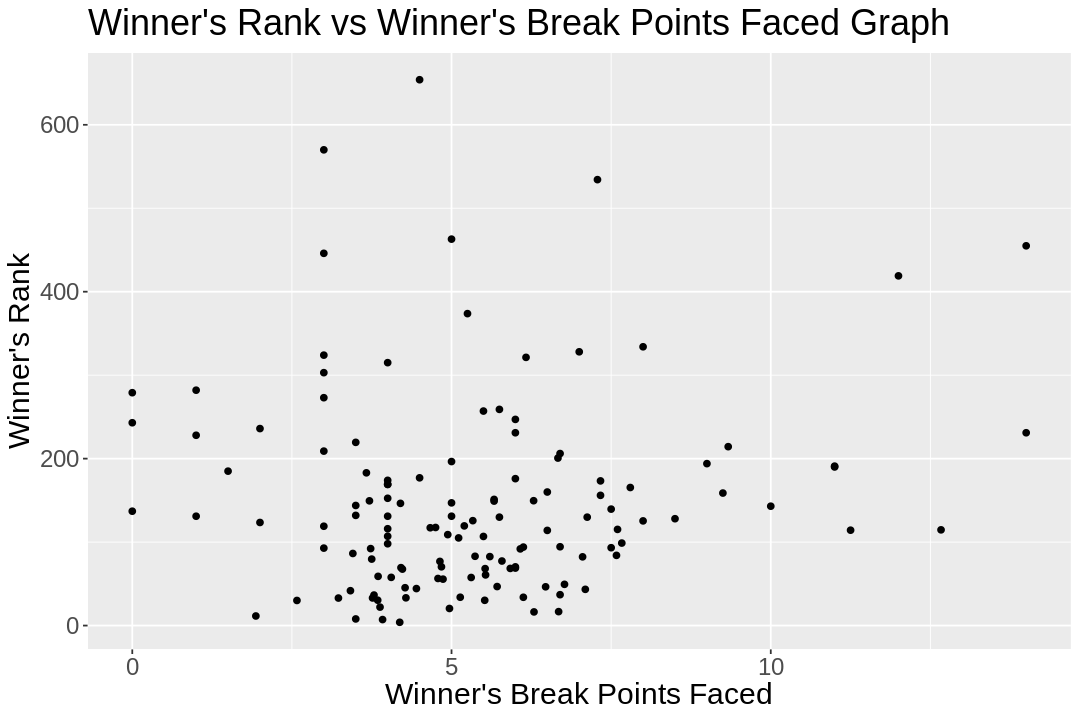

In [25]:
# Winner's Rank vs Winner's Break Points Faced

rank_vs_bpf <- player_training %>% 
    ggplot(aes(x = w_bpFaced, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Break Points Faced", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Break Points Faced Graph") +
        theme(text = element_text(size = 18))

rank_vs_bpf

In [110]:
set.seed(1)

player_recipe <- recipe(win_percent ~ ., data = player_training) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("regression")

player_vfold <- vfold_cv(player_training, v = 5, strata = win_percent)

gridvals <- tibble(neighbors = seq(from = 1, to = 40))

player_wkflw <- workflow() %>% 
    add_recipe(player_recipe) %>% 
    add_model(player_spec)

player_recipe
player_results <- player_wkflw %>% 
    tune_grid(resamples = player_vfold, grid = gridvals) %>% 
    collect_metrics() %>% 
    filter(.metric == "rmse") %>% 
    filter(mean == min(mean))


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”


Recipe

Inputs:

      role #variables
   outcome          1
 predictor         10

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [112]:
kmin <- player_results %>% pull(neighbors)

min_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>% 
    set_engine("kknn") %>% 
    set_mode("regression")

min_fit <- workflow() %>% 
    add_recipe(player_recipe) %>% 
    add_model(min_spec) %>% 
    fit(data = player_training)

player_summary <-  min_fit %>% 
    predict(player_testing) %>% 
    bind_cols(player_testing) %>% 
    metrics(truth = win_percent, estimate = .pred) %>% 
    filter(.metric == "rmse")

player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.109549


<br>

# **Methods**

From the data set we will be using only the columns rank, age, height, (still need to decide other columns). We will be using regression analysis that uses data to understand how a ranking variable's value is affected when one or more independent variables change or stay the same. By understanding each variable's relationship and how they developed in the past, we will anticipate possible outcomes and make better predictions for future ranking.

We will visualize the results by using graphs to find the relationship between the data. We will be using scatterplot and functions such as ggplot/ggpairs to visualize the results with future ranking on the y-axis and rest on the x-axis. 


<br>

# **Expected Outcomes and Significance**

It is to be expected that tennis player statistics, to a certain degree, should be able to predict their current and future rankings. In general observation, the majority of the top players will remain near the top of the rankings for the majority of their careers. It will be interesting to see if any predictors can significantly predict which players are to rise or fall in their rankings. It is expected that age, current rankings, and their previous rise in rankings over preceding years. There are also some factors that will be interesting to explore their effect on world rankings, such as physical attributes. 

It’ll be interesting to explore whether, and if so, the extent, the future ranking of Tennis players can be forecasted using current statistics. Although there are not any significant real world impacts that any of our findings will lead to, it will be an interesting read for any sports fans and data junkies to read and expand upon. Based on our findings, it will be interesting to explore whether there are any missing factors that could improve on our prediction model; and the result of applying our model to other sports as well.
